# LInear Regression

## Reference

In [304]:
# Schlimmer,Jeffrey. (1987). Automobile. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.
# https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

## Import Library

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import re
from mlxtend.plotting import heatmap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.special import inv_boxcox
from statsmodels.graphics.tsaplots import plot_acf

## IMport dataset

In [306]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/car_price.csv'
car = pd.read_csv(path)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Clean and Organize the dataset

In [307]:
car.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Onehotencoder (change object category to numerical type)

In [308]:
object_name = car.select_dtypes('object').columns
# # change object to integior type 
# le = LabelEncoder()
# car[object_name] = car[object_name].apply(le.fit_transform)


# change the category type to numerical (use onehotencoder)
# ohe = OneHotEncoder(sparse_output = False, dtype = 'int')

# remove the first columns in each category
ohe = OneHotEncoder(sparse_output = False, dtype = 'int', drop = 'first')
# car= ohe.fit_transform(car[object_name])
temp1 = ohe.fit_transform(car[object_name])
df_ohe = pd.DataFrame(temp1)
df_ohe.head()
# ohe.categories_[4]

# car

# # remove the Car Id
# car1 = car.copy()
# car1 = car1.drop(columns= 'car_ID')


,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [309]:
# use get_feature_names_out() to get the all new columns name
object_all_list = ohe.get_feature_names_out()
object_all_list


# # for each object_name we need to rename 
# object_all_list = []
# for i, j in enumerate(object_name):
#   temp2 = j + '_' + ohe.categories_[i][1:]
#   # change temp2 to a list and then use + otherwise use append() will add each each to list not a whole list
#   temp2 = temp2.tolist()
#   object_all_list = object_all_list + temp2
# # object_all_list = object_all_list[0]
# object_all_list


array(['CarName_alfa-romero Quadrifoglio', 'CarName_alfa-romero giulia',
       'CarName_alfa-romero stelvio', 'CarName_audi 100 ls',
       'CarName_audi 100ls', 'CarName_audi 4000', 'CarName_audi 5000',
       'CarName_audi 5000s (diesel)', 'CarName_audi fox',
       'CarName_bmw 320i', 'CarName_bmw x1', 'CarName_bmw x3',
       'CarName_bmw x4', 'CarName_bmw x5', 'CarName_bmw z4',
       'CarName_buick century', 'CarName_buick century luxus (sw)',
       'CarName_buick century special',
       'CarName_buick electra 225 custom',
       'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skyhawk',
       'CarName_buick skylark', 'CarName_chevrolet impala',
       'CarName_chevrolet monte carlo', 'CarName_chevrolet vega 2300',
       'CarName_dodge challenger se', 'CarName_dodge colt (sw)',
       'CarName_dodge colt hardtop', 'CarName_dodge coronet custom',
       'CarName_dodge coronet custom (sw)', 'CarName_dodge d200',
       'CarNam

In [310]:
# change df_ohe columns name to name after onehotencoder 
df_ohe.columns = object_all_list
df_ohe.head()

,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [311]:
# concate the df_ohe and car 
cond = ~car.columns.isin(object_name)
car1 = pd.concat(objs = (df_ohe, car[car.columns[cond]]),axis = 'columns')
car1.head()

,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,0,0,0,0,0,0,0,0,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,1,0,0,0,0,0,0,0,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,0,0,0,0,0,0,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,0,0,1,0,0,0,0,0,0,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,0,0,0,1,0,0,0,0,0,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [312]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 191 entries, CarName_alfa-romero Quadrifoglio to price
dtypes: float64(8), int32(175), int64(8)
memory usage: 165.9 KB


In [313]:
# # for each object_name
# # tag the hot_encoded columns with that object name (e.g. fueltype_disel, fuletype_gas)
# col_name_list = []
# for i in range(len(object_name)):
#   prefix = object_name[i]
#   drop_index = ohe.drop_idx_[i]
#   cond = ohe.categories_[i] != ohe.categories_[i][drop_index]
#   encoded_list = ohe.categories_[i][cond]
#   # print(encoded_list)
#   temp_cols = [prefix + '_' + x for x in encoded_list]
#   # print(temp_cols)
#   col_name_list += temp_cols

# # assign col_name_list to one-hot-encoded dataframe
# df_ohe.columns = col_name_list
# df_ohe.head()

# # remove categorical columns from original dataframe
# cond = ~car.columns.isin(object_name)
# keep_cols = car.columns[cond]
# car2 = car[keep_cols]

# # join/concat numerical columns with one-hot-encoded columns
# car3 = pd.concat(objs = [car2, df_ohe], axis = 1)

# # car3.head()
# car3.info()

## Normalize the data

In [314]:
# normalize all features instead of 'price'
car2 = car1.copy()
car2 = car1.drop(columns = 'car_ID')
std = StandardScaler()
car2.iloc[:,:-1] = std.fit_transform(car2.iloc[:,:-1])

### Normalize the price so that it change transform to a normal distribution

In [315]:
price = car2['price']

In [316]:
price3, lmbda1 = boxcox(price) ## it minimise the standard deviation 
# change car2's price to price3
car3 = car2.copy()
# pick reseasonable lmbda
lmbda2 = np.round(lmbda1/0.5)*0.5

price3 = boxcox(price3, lmbda= lmbda2 )
car3['price'] = price3


## Feature selection 

In [317]:
# find the features which is mostly related to target price

# correlation cofficient is noted as r
r = car3.corr()['price']

# set threshold 0.5 i.e any correlation cofficient number is below 0.5 is not considered as import features
threshold = 0.5

cond = np.abs(r) <= 0.5

feature_importance = r[~cond].index[:]

car3 = car3[feature_importance]

car3


,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,-1.188177,1.302831,0.537874,-0.689072,1.086670,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.412947
1,-1.188177,1.302831,0.537874,-0.689072,1.086670,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.413187
2,-1.188177,1.302831,-1.859172,-0.689072,1.086670,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.413187
3,0.841625,-0.767559,0.537874,-0.689072,1.086670,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.412989
4,-1.188177,-0.767559,-1.859172,-0.689072,1.086670,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.413249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.188177,1.302831,0.537874,-0.689072,1.086670,1.721873,1.198549,1.398245,0.763241,0.339248,1.666445,0.250533,-0.340094,-0.400490,0.413210
201,-1.188177,1.302831,0.537874,-0.689072,1.086670,1.721873,1.198549,1.351515,0.949992,0.339248,1.666445,1.416637,-0.953012,-0.837195,0.413341
202,-1.188177,1.302831,-1.859172,-0.689072,1.086670,1.721873,1.198549,1.398245,0.878757,1.109571,0.926204,0.757535,-1.106241,-1.128332,0.413460
203,-1.188177,1.302831,-1.859172,-0.689072,-0.920243,1.721873,1.198549,1.398245,1.273437,0.435538,-1.183483,0.047732,0.119594,-0.546059,0.413502


## visualize the features and price 

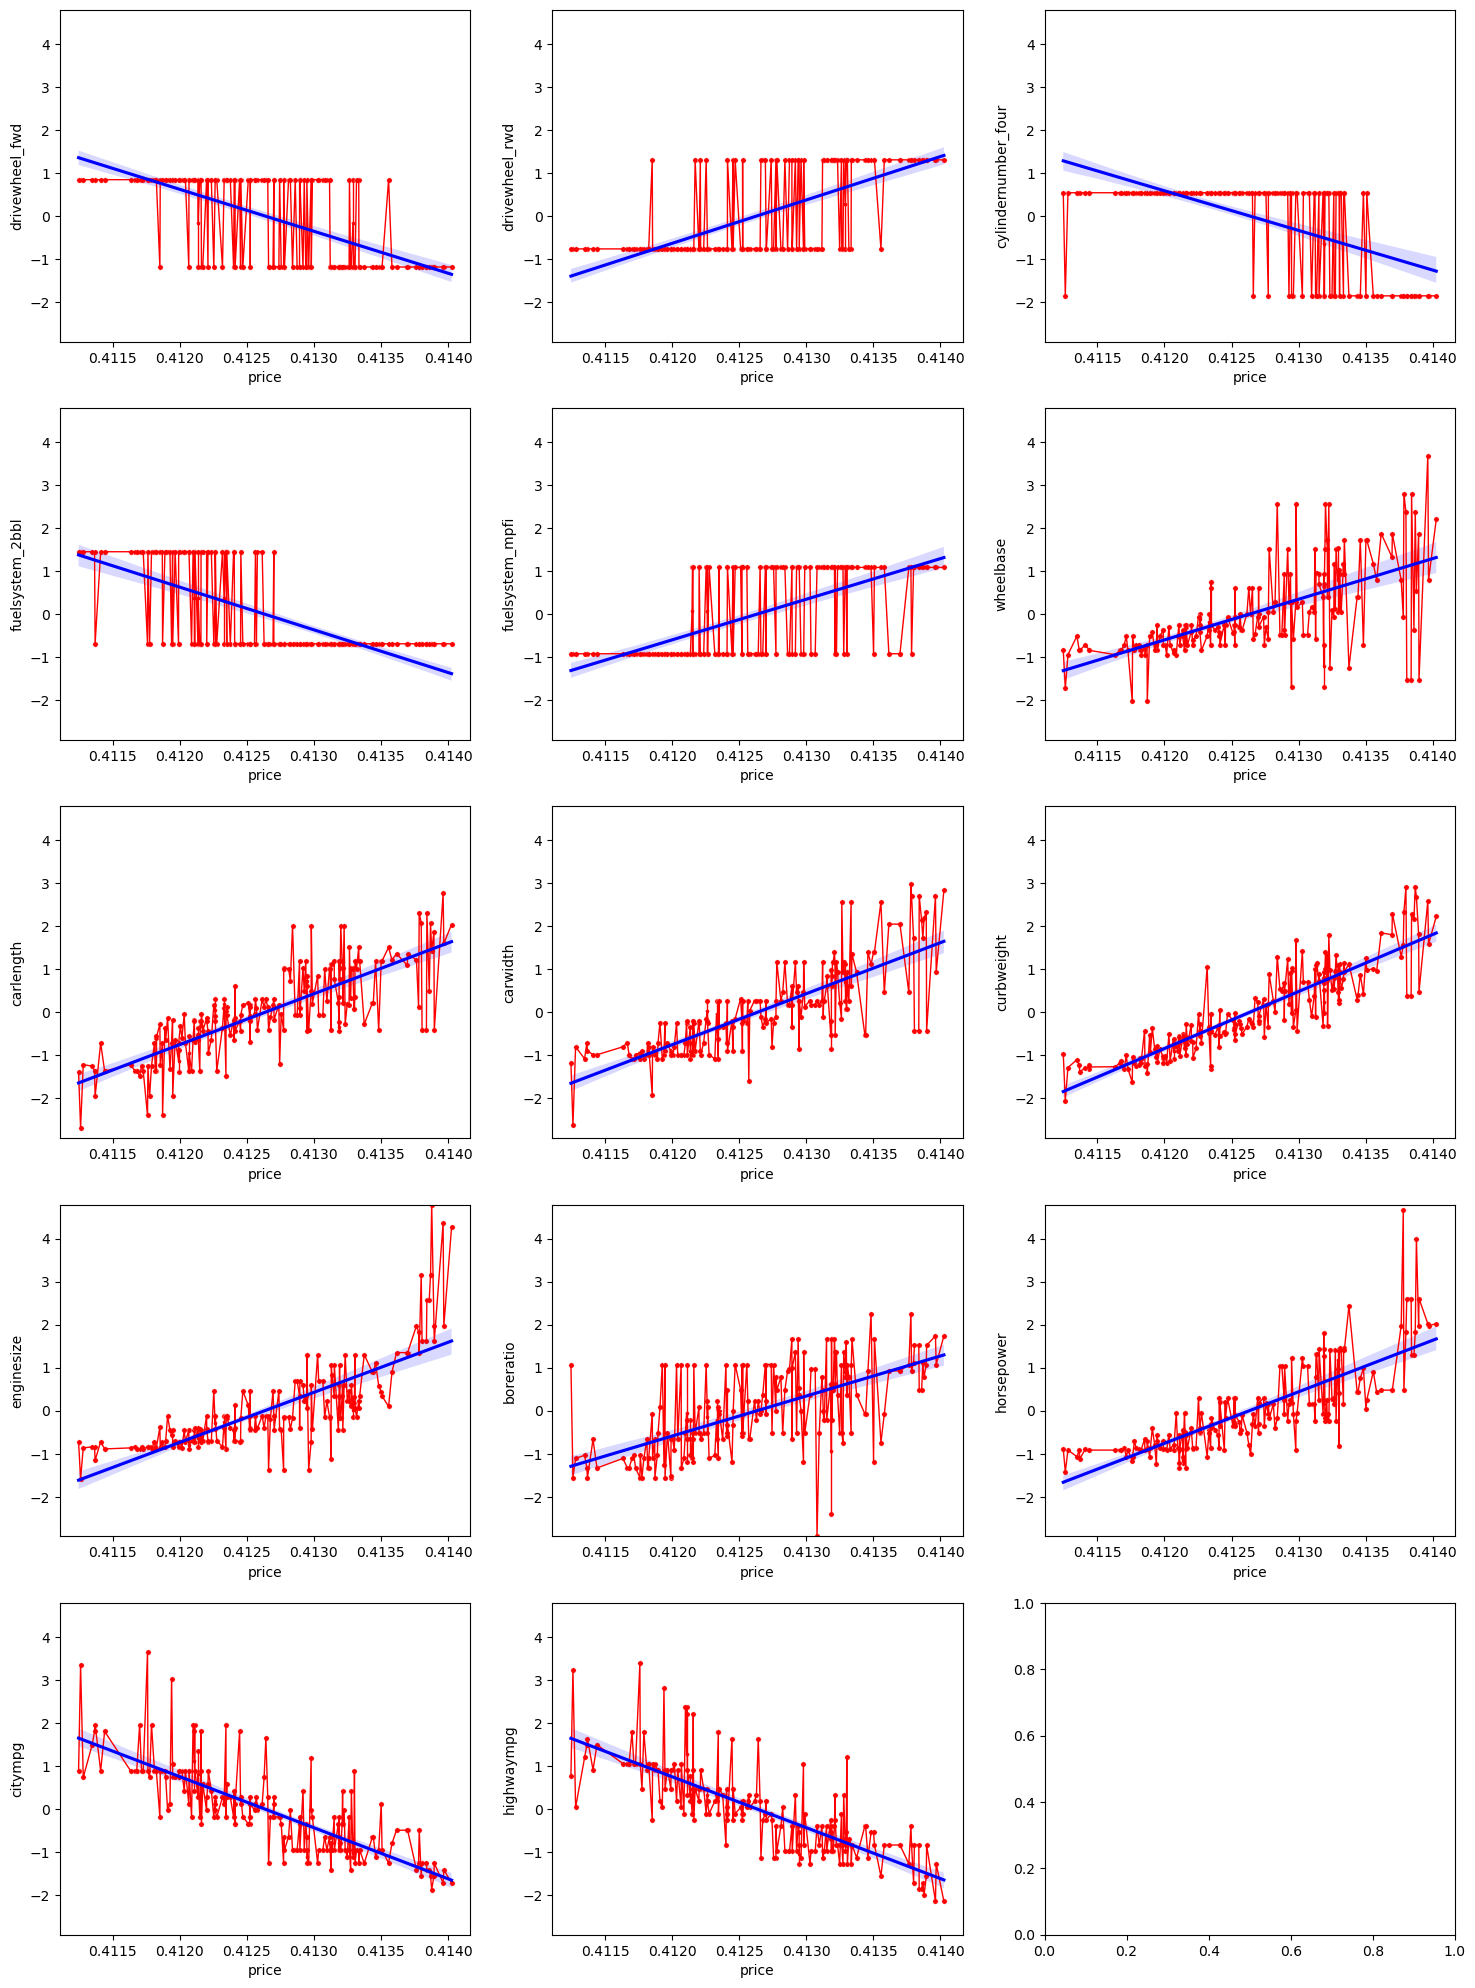

In [318]:
# subplots
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (18,25))
axes = np.ravel(axes)

# set X limit
min_limit = car3.iloc[:,:-1].min().min() 
max_limit = car3.iloc[:, :-1].max().max() 

for i,j in enumerate(feature_importance[: -1]):
  q = sns.scatterplot(ax =axes[i], data = car3, y = j, x = 'price', marker = 'o', s = 15, color = 'r')
  p = sns.pointplot(ax = axes[i], data = car3, y = j, x = 'price', marker = '*', color = 'r', linewidth = 1.0, native_scale = True)
  p.set_ylim((min_limit, max_limit))
  l = sns.regplot(ax = axes[i], data = car3, y = j, x = 'price',marker = '', color = 'b')
plt.show()

## Remove features are correlated 

In [319]:
# split the X and y from car3
X = car3.iloc[:,: -1]
y = car3['price']

# find the features which are correlated and remove 
cor = X.corr()

cor.iloc[:,:] = np.tril(cor, -1)
cor


,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
drivewheel_fwd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
drivewheel_rwd,-0.911996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
cylindernumber_four,0.425481,-0.434461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
fuelsystem_2bbl,0.410403,-0.464056,0.345607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
fuelsystem_mpfi,-0.437655,0.448977,-0.373291,-0.634114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
wheelbase,-0.460355,0.498830,-0.309492,-0.396505,0.348891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
carlength,-0.508714,0.538370,-0.400210,-0.487237,0.511374,0.874587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
carwidth,-0.472116,0.511149,-0.523135,-0.522594,0.461896,0.795144,0.841118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
curbweight,-0.666039,0.669987,-0.576463,-0.577159,0.520220,0.776386,0.877728,0.867032,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
enginesize,-0.518391,0.565509,-0.631431,-0.442562,0.483520,0.569329,0.683360,0.735433,0.850594,0.000000,0.000000,0.000000,0.000000,0.0


In [320]:
cond = np.abs(cor) > 0.8
p,q = np.where(cond)
m =zip(p,q)
pair = []
# find the index and columns which are correlated
for ind, col in m:
  du = [cor.columns[ind], cor.columns[col], cor.iloc[ind,col].round(2)]
  pair.append(du)
pair

[['drivewheel_rwd', 'drivewheel_fwd', -0.91],
 ['carlength', 'wheelbase', 0.87],
 ['carwidth', 'carlength', 0.84],
 ['curbweight', 'carlength', 0.88],
 ['curbweight', 'carwidth', 0.87],
 ['enginesize', 'curbweight', 0.85],
 ['horsepower', 'enginesize', 0.81],
 ['citympg', 'horsepower', -0.8],
 ['highwaympg', 'citympg', 0.97]]

## VIF (Variance Inflation Factor ) 

calculate the correlation between every feature and the remaining features

In [321]:
# judge standard whether there is variance related
X1 = X.copy()
judge = 0
remain_list = X1.columns
while judge ==  0:
  # VIF = pd.DataFrame({'vif':vif, 'features' :X.columns}).sort_values(by = 'vif', ascending= False).reset_index(drop = True)
  vif = [variance_inflation_factor(exog = X1, exog_idx = i) for i in range(len(X1.columns))]
  if max(vif) < 5.0:
    judge = 1
  else:
    # index_large = np.where(np.array(vif) > 5.0)
    index_max_vif = np.where(vif == max(vif))[0]
    remove_col = X1.columns[index_max_vif]
    X1 = X1.drop(columns = remove_col, errors = 'ignore')
    remain_list = X1.columns
    # print(remain_list)

# remain_list
VIF = pd.DataFrame({'vif':vif, 'features' :X1.columns}).sort_values(by = 'vif', ascending= False).reset_index(drop = True)
VIF

,vif,features
0,4.901743,carwidth
1,3.332498,enginesize
2,3.018458,wheelbase
3,3.010138,highwaympg
4,2.534670,boreratio
5,2.431909,cylindernumber_four
6,2.071687,fuelsystem_mpfi
7,2.055704,drivewheel_fwd
8,1.921290,fuelsystem_2bbl


In [322]:
X = X[VIF.features]

## Split the data into traung and test

In [323]:
X_traing, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## LinearRegression

In [324]:
# apply and fit linearregression
model = LinearRegression()
model.fit(X_traing, y_train)
model.coef_

array([ 9.43508426e-05,  1.11001097e-04,  2.82359460e-05, -1.23570811e-04,
        9.04816630e-05, -1.10792991e-04,  4.11209749e-05, -6.50984041e-05,
       -1.31876002e-04])

In [325]:
model.score(X_traing, y_train)

0.8637677031003301

In [326]:
# predict the target
y_predict = model.predict(X = X_test)

# calculate the residual 
residual = y_test - y_predict
residual
# residual

152   -0.000097
72     0.000052
9      0.000025
112    0.000203
102   -0.000265
         ...   
118   -0.000333
156   -0.000081
8      0.000220
145   -0.000135
190    0.000033
Name: price, Length: 62, dtype: float64

In [327]:
y_afterinvse = inv_boxcox(y_predict, lmbda2 )
y_afterinvse1 = inv_boxcox(y_afterinvse, lmbda1 ).round(2)

### Class

In [328]:
class LinearRegressionGD:
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
    self.b_ = np.array([0.])
    self.losses_ = []
    
    
    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = y - output
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta *2.0 * errors.mean()
      loss = (errors**2).mean()
      self.losses_.append(loss)
    
    return self
  
  
  def net_input(self , X):
    return np.dot(X, self.w_) + self.b_
  
  def predict(self , X):
    return self.net_input(X)

  def premeter(self, X, y):
    return self.w_
  
  def intersection(self, X, y):
    return self.b_

## Visualize the results 

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


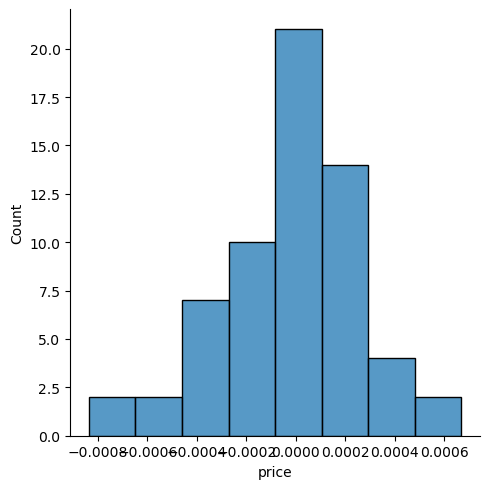

In [329]:
sns.displot(data = residual, kind = 'hist')
plt.show()

### Autocorrelation

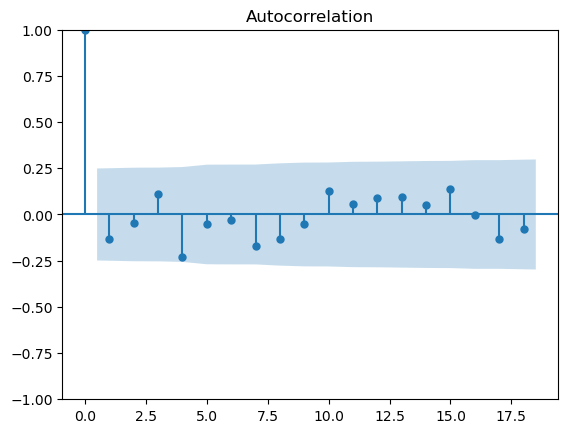

In [330]:
# all test data has not big correlation with the previous data
p1 = plot_acf(residual)

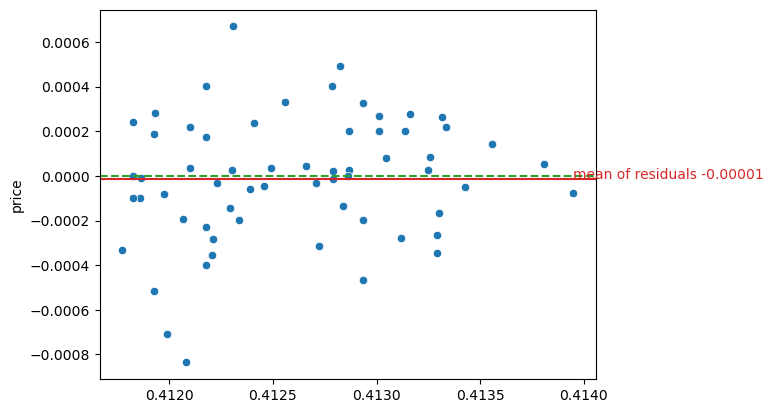

In [373]:
# check the resdiual are evenly distributed 
sns.scatterplot(y = residual, x = y_predict)


plt.axhline(y = 0, linestyle = '--', color = 'C2')
mean_residual = residual.mean()
plt.axhline(y = mean_residual, linestyle = '-', color = 'C3')
plt.text(y = mean_residual, x = max(y_predict),s = f'mean of residuals {"{:.5f}".format(mean_residual)}', color = 'C3')
plt.show()

In [332]:
b = model.intercept_

In [333]:
#change cofficient from numerical to str
a = model.coef_.tolist()
features = model.feature_names_in_.tolist()
type(a)
type(features)
new = zip(a,  features)

In [334]:
equation = []
equation

[]

## Equation